In [1]:
import processing.core as itamed
import matplotlib.pyplot as plt
import nmrglue as ng
import numpy as np

## 1D case

|████████████████████████████████████████| 10000/10000 [100%] in 3.5s (2817.13/s)                                       


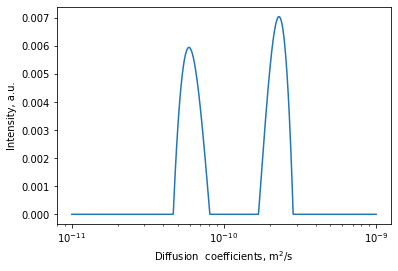

In [2]:
%matplotlib inline
I = [1, 0.9999, 0.9986, 0.9985, 0.9980, 0.9962, 0.9947, 0.9934, 0.9927, 0.9914, 0.9884, 0.9862,
     0.9842, 0.9806, 0.9785, 0.9749, 0.9708, 0.9669, 0.9613, 0.9561, 0.9486, 0.9413, 0.9325, 0.9235,
     0.9128, 0.9021, 0.8869, 0.8718, 0.8550, 0.8365, 0.8154, 0.7926, 0.7684, 0.7406, 0.7123, 0.6794,
     0.6465, 0.6106, 0.5740, 0.5352, 0.4957, 0.4554, 0.4157, 0.3764, 0.3376, 0.3007, 0.2654, 0.2316,
     0.2004, 0.1711, 0.1437, 0.1198, 0.0973, 0.07674, 0.05967, 0.04383, 0.03195, 0.02219, 0.01445,
     0.008854, 0.005409, 0.002772, 0.001212]
k = [27969939.3652834, 31868287.1823864, 36450117.0678576, 41492545.2225887, 47350942.7736749,
     54119378.5488770, 61712682.1230602, 70401336.6871577, 80512888.2044978, 91757502.9895481,
     104707503.700095, 119549333.057825, 136482993.255096, 155722045.954930, 177493612.291019,
     202714651.467301, 231053521.430348, 263942017.536029, 301076746.628144, 343732581.438474,
     392031980.936491, 447519029.844535, 510429465.209951, 582627996.738588, 664493300.897751,
     758269470.083025, 865210755.331217, 987402913.968963, 1127219277.09665, 1285648132.38372,
     1467209444.63071, 1674347308.42556, 1910710775.06736, 2180396923.36520, 2487994645.42885,
     2839897796.65631, 3240727614.14468, 3696856342.88556, 4218439602.67598, 4813929039.83232,
     5494434380.65536, 6268747246.93960, 7154271784.26559, 8162575916.04713, 9315164397.78601,
     10629442081.2852, 12129693554.7780, 13840575585.7186, 15810399296.8974, 18035508433.5465,
     20577188836.9518, 23468067983.4087, 26781776623.5351, 30563061010.5362, 34859718278.5171,
     39817399741.5720, 45407969498.0644, 51797531063.6796, 59126580328.7680, 67495033642.8157,
     77009671837.3349, 87854578851.0945, 100239742861.620]
d, a = itamed.itamed1d(1e4, [1e-11, 1e-9, 1024], I, k, 1e-5, 'D')
plt.plot(d, a)
plt.xscale('log')
plt.xlabel('Diffusion  coefficients, m$^2$/s')
plt.ylabel('Intensity, a.u.')
plt.show()

## 2D case:

/home/murb/.local/lib/python3.8/site-packages/nmrglue/fileio/bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


|████████████████████████████████████████| 1000/1000 [100%] in 9.2s (108.92/s)                                          


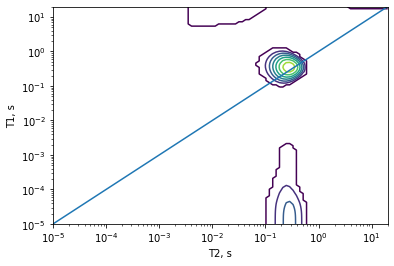

In [3]:
%matplotlib inline
dic, data = ng.bruker.read('T1T2')
data = data[:, 51:, 70:]
data = -np.real(np.trapz(data, axis=-1))
t1delay = np.loadtxt('T1T2/vdlist')
echotime = 0.002000000
t2delays = np.arange(echotime, echotime * 512, echotime)
t2delays = t2delays[50:]
d1, d2, a = itamed.itamed2d(1e3, [1e-5, 20, 101], [1e-5, 20, 100], data, t1delay / 10, t2delays, 1e-4, 'T1', 'T2')
plt.contour(d2, d1, a.T)
plt.plot([1e-5, 20], [1e-5, 20])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('T2, s')
plt.ylabel('T1, s')
plt.show()